# MA 506 Probability and Statistical Inference
# Lecture 5: Statistical Inference

In [3]:
import numpy as np
from matplotlib.pyplot import *
from scipy import stats

# 1. Categories of statistical methods

## 1.1 Descriptive statistical methods : 
Descriptive statistics is the term given to the analysis of data that helps describe, show or summarize data in a meaningful way such that, for example, patterns might emerge from the data. Descriptive statistics do not, however, allow us to make conclusions beyond the data we have analysed or reach conclusions regarding any hypotheses we might have made. They are simply a way to describe our data. Example: **mean, variance** etc.

## 1.2 Inferential statistical methods: 
Inferential statistics are techniques that allow us to make generalizations about the population from which obtained samples were drawn. It is, therefore, important that the sample accurately represents the population. Hence sampling technique chosen should complement the type of analysis that needs to be done.

<img src = "Picture1.png" width = 400>

### Main steps:
1. Goal is to deduce structure of a phenomenon (underlying the whole population) based on observed data (a small sample from the population).
2. Given a sample S
$$S = \{(x_1,y_1),(x_2,y_2),..,(x_n,y_n)\}, \text{ where }x_j \in \mathbb{R}^d, y_j \in \mathbb{R}$$
of observed realizations of a random variables (x,y), we want to infer the underlying probability distribution that produces data S.

# 2. Some theoretical results

## 2.1 Stong law of large numbers:
Let $\{x_1, x_2, ..x_n\}$ is a sequence of i.i.d random variables with $\mathbb{E}[x_i] = \mu$ and $Var(x_i) = \sigma^2 < \infty$ and define $S_n = \sum_{i=1}^nx_i/n$. Then for every $\epsilon >0$:
$$
\boxed{P \Bigg(\lim_{n \to \infty}|S_n - \mu| < \epsilon \Bigg) = 1}
$$

####  Demonstrating Stong law of large numbers

Lets consider the experiment of rolling a dice n times. Here we are considering that each face 1 to 6 is equally likely. For example on a single throw of dice following face comes up

In [4]:
np.random.choice([1,2,3,4,5,6],p = [1/6,1/6,1/6,1/6,1/6,1/6])

4

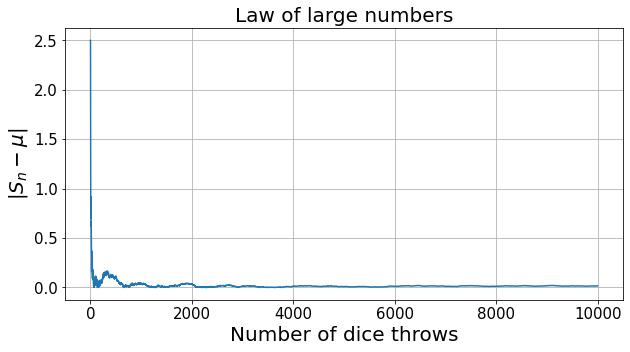

In [5]:
## Getting the figure and the axis
figure(figsize=(10,5))
ax = subplot2grid((1,1),(0,0))

num = 10000
throw = []
mu = 3.5
term = []
for i in range(num):
    #face = np.random.choice([1,2,3,4,5,6],p = [1/6,1/6,1/6,1/6,1/6,1/6])
    face = np.random.choice([1,2,3,4,5,6])  ## Generating a sample 
    throw.append(face)
    S_n = sum(throw)/len(throw)
    term.append(abs(S_n-mu))
plot(term)
ax.set_xlabel('Number of dice throws',size = 20)
ax.set_ylabel(r'$|S_n - \mu|$',size = 20)
ax.set_title('Law of large numbers',size = 20)
yticks(size=15)
xticks(size=15)
grid(True)
show()

## 2.2 Central Limit Theorem

Suppose $\{x_1, x_2, ..x_n\}$ is a sequence of i.i.d random variables with $\mathbb{E}[x_i] = \mu$ and $Var(x_i) = \sigma^2 < \infty$, then as $n \to \infty$, the random variable $\frac{\sqrt{n}(S_n - \mu)}{\sigma}$ (where $S_n = \sum_{i=1}^n x_i/n$) converges in distribution to standard normal distribution: $N(0,1)$. i.e.,

$$
\lim_{n \to \infty} \frac{\sqrt{n}(S_n - \mu)}{\sigma} \to N(0,1)
$$


In [6]:
## Generating the Population for the dice throw
population = np.random.choice([1,2,3,4,5,6],size=100000)

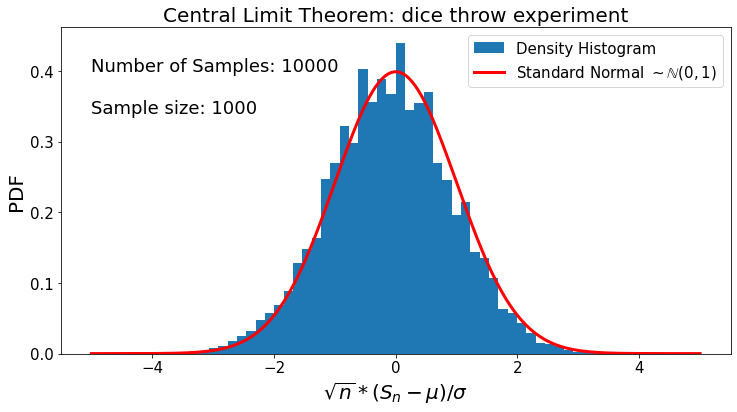

In [7]:
## Getting the figure and the axis
figure(figsize=(12,6))
ax = subplot2grid((1,1),(0,0))


num_samples = 10000
sample_size = 1000
samples = [np.random.choice(population,size=sample_size) for i in range(num_samples)]
rvs = []
for i in samples:
    rv = np.sqrt(sample_size)*((sum(i)/sample_size - mu)/np.sqrt(105/36))
    rvs.append(rv)

hist(rvs,density=True,bins=50, label = 'Density Histogram')

ax.set_xlabel('$\sqrt{n}*(S_n - \mu)/\sigma$',size = 20)
ax.set_ylabel('PDF',size = 20)
ax.set_title('Central Limit Theorem: dice throw experiment',size = 20)
yticks(size=15)
xticks(size=15)

x = np.linspace(-5,5,200)
plot(x, stats.norm.pdf(x, 0, 1), color = 'r',lw = 3, label = 'Standard Normal $\sim \mathbb{N}(0,1)$')
ax.legend(loc=1, prop={'size': 15})
#grid(True)
text(-5,0.40,'Number of Samples: '+str(num_samples), fontsize=18)
text(-5,0.34,'Sample size: '+str(sample_size), fontsize=18)
show()

# From Bayes theorem to Bayesian inference

Here we will discuss how Bayes formula directly corresponds to taking the information from data about a system and updating our belief about it

For a model with parameters $Q = [Q_1, Q_2,...,Q_p]^T$ and observations $v = [v_1, v_2,..., v_n]^T$

### $P(q|v) = \frac{P(v|q)P(q)}{P(v)}$

1. $P(q|v):$ posterior distribution of parameters after observing data
2. $P(v|q):$ Likelihood of observing that particular dataset.
3. $P(q):$ Prior assumed distribution on the parameters.
4. $P(v):$ Marginal distribution for the data observed.

# Coin Toss experiment in a bayesian framework

Here, we will assume initially that we do not know the probability of heads turning up. Then using the data of toin tosses we will estimate this probability using a Bayesian framework

We want to estimate the the probability of heads from the same experiment we carried out before. However this time instead of just using the mean and get a point estimate we want to get the full distribution for the probability of heads

## Binomial likelihood function

If out of n tosses, y turned out to be success (heads)


### $L(p|n,y) =$ ${n}\choose{y}$ $p^{y}*(1-p)^{n-y}$

However we dont care about the scaling  ${n}\choose{y}$ as it is independent of p


### $L(p|n,y) = p^{y}*(1-p)^{n-y}$

In [8]:
## 1000 experiments of 100 coin tosses each
X = np.random.binomial(100,p=0.5,size=1000)
len(X)

1000

In [9]:
## X already contains the result of 10000 repeat of the experiment
num_success = X[0] ## considering the 1st experiment
x = np.linspace(0,1,200)
prior = 1 ## Uniform prior, i.e all values from 0 to 1 are equaly likely
likelihood = (x**num_success)*((1-x)**(100-num_success))
posterior = likelihood*prior/max(likelihood*prior)

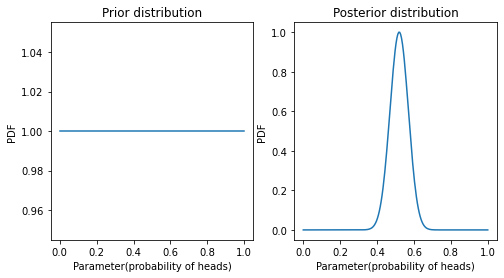

In [10]:
fig = figure(figsize=(8,4))
## Plotting the prior
ax = fig.add_subplot(1,2,1)
ax.plot(x,prior*np.ones(x.shape))
ax.set_xlabel('Parameter(probability of heads)', size = 10)
ax.set_ylabel('PDF', size = 10)
ax.set_title('Prior distribution')

ax = fig.add_subplot(1,2,2)
ax.plot(x,posterior)
ax.set_xlabel('Parameter(probability of heads)', size = 10)
ax.set_ylabel('PDF', size = 10)
ax.set_title('Posterior distribution')
show()

### Visualization

In [11]:
def coin_toss(p = 0.5, n = 0):
    ## Flip the coin and generate the data
    num_success = np.random.binomial(n,p)
    ## X axis of pdf
    x = np.linspace(0,1,200)
    ## computing posterior
    prior = 1
    likelihood = (x**num_success)*((1-x)**(n-num_success))
    posterior = likelihood*prior/max(likelihood*prior)
    plot(x,posterior)
    xlabel('Parameter(probability of heads)', size = 10)
    ylabel('PDF', size = 10)
    title('Posterior distribution', size = 20)
    show()

In [12]:
from ipywidgets import interact

In [13]:
interact(coin_toss, p = (0,1,0.01), n = (0,1000,10))
show()

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…